#                           Crowd Evacuation in a floor

## Problem statement:
There is a floor which contains some exit doors and some number of people. Match a exit door for each person such that he/she can exit in minimum possible time.

### Solution:
We consider a floor virtually as a matrix of cells. And then locate those cells where people and exit doors are there. After getting the information(in which cell there is an exit door and in which cell there is a person), we can do exit-door matching to everybody using the following code.

In [20]:
import matplotlib.pyplot as plt
from queue import PriorityQueue


def match_doors(N,M,ppl_coor,exits_coor,blockages):

    accessible = [1 for i in range(0,(N+1)*(M+1)+1)]
    for i in blockages:
        accessible[(i[0] - 1)*N + i[1]] = 0

    print("O => Accessibile cell, X => Non-accessible cell")
    for i in range(1,N+1):
        for j in range(1,M+1):
            if(accessible[(i - 1)*N + j] == 1):
                print("O",end=" ")
            else:
                print("X",end=" ")
            # print(accessible[(i - 1)*N + j],end = " ");
        print()
    print()

    ppl_count = len(ppl_coor) #Count of people
    exits_count = len(exits_coor) #Count of exit doors

    pq = PriorityQueue() #Creating a min-priority queue

    # Pushing (0,Ei_x,Ei_y) into the min-priority queue
    for i in exits_coor:
        temp = [0]
        temp.append(i[1])
        temp.append(i[2])
        temp.append(i[0])
        pq.put(temp)

    # while(pq.empty() == False):
    #     print(pq.get())

    visited = [0 for i in range(0,(N+1)*(M+1)+1)]
    for i in exits_coor:
        visited[(i[1] - 1)*N + i[2]] = 1
    # for i in range(1,N+1):
    #     for j in range(1,M+1):
    #         print(visited[(i - 1)*N + j],end=" ")
    #     print()
    ans = [[1e18,"NA"] for i in range(0,(N+1)*(M+1)+1)]

    count = 0

    while(pq.empty() == False):
        cur = pq.get()
        dist = cur[0]
        x = cur[1]
        y = cur[2]
        exit_door = cur[3]
        # print(cur)
        # for i in range(1,N+1):
        #     for j in range(1,M+1):
        #         print(visited[((i-1)*N)+j],end=" ")
        #     print()

        ans[(x - 1)*N + y] = [dist,exit_door]

        #top
        n_x = x - 1; n_y = y
        if((n_x >= 1) and (n_x <= N) and (n_y >= 1) and (n_y <= M) and (visited[((n_x - 1) * N)+n_y] == 0) and (accessible[((n_x - 1) * N)+n_y] == 1)):
            pq.put([1+dist,n_x,n_y,exit_door])
            visited[(n_x - 1)*N + n_y] = 1

        #bottom
        n_x = x + 1; n_y = y
        if((n_x >= 1) and (n_x <= N) and (n_y >= 1) and (n_y <= M) and (visited[((n_x - 1) * N)+n_y] == 0) and (accessible[((n_x - 1) * N)+n_y] == 1)):
            pq.put([1+dist,n_x,n_y,exit_door])
            visited[(n_x - 1)*N + n_y] = 1

        #left
        n_x = x; n_y = y - 1
        if((n_x >= 1) and (n_x <= N) and (n_y >= 1) and (n_y <= M) and (visited[((n_x - 1) * N)+n_y] == 0) and (accessible[((n_x - 1) * N)+n_y] == 1)):
            pq.put([1+dist,n_x,n_y,exit_door])
            visited[(n_x - 1)*N + n_y] = 1

        #top
        n_x = x; n_y = y + 1
        if((n_x >= 1) and (n_x <= N) and (n_y >= 1) and (n_y <= M) and (visited[((n_x - 1) * N)+n_y] == 0) and (accessible[((n_x - 1) * N)+n_y] == 1)):
            pq.put([1+dist,n_x,n_y,exit_door])
            visited[(n_x - 1)*N + n_y] = 1

        #top-right
        n_x = x - 1; n_y = y + 1
        if((n_x >= 1) and (n_x <= N) and (n_y >= 1) and (n_y <= M) and (visited[((n_x - 1) * N)+n_y] == 0) and (accessible[((n_x - 1) * N)+n_y] == 1)):
            pq.put([1+dist,n_x,n_y,exit_door])
            visited[(n_x - 1)*N + n_y] = 1
        
        #top-left
        n_x = x - 1; n_y = y - 1
        if((n_x >= 1) and (n_x <= N) and (n_y >= 1) and (n_y <= M) and (visited[((n_x - 1) * N)+n_y] == 0) and (accessible[((n_x - 1) * N)+n_y] == 1)):
            pq.put([1+dist,n_x,n_y,exit_door])
            visited[(n_x - 1)*N + n_y] = 1

        #bottom-left
        n_x = x + 1; n_y = y - 1
        if((n_x >= 1) and (n_x <= N) and (n_y >= 1) and (n_y <= M) and (visited[((n_x - 1) * N)+n_y] == 0) and (accessible[((n_x - 1) * N)+n_y] == 1)):
            pq.put([1+dist,n_x,n_y,exit_door])
            visited[(n_x - 1)*N + n_y] = 1

        #bottom-right
        n_x = x + 1; n_y = y + 1
        if((n_x >= 1) and (n_x <= N) and (n_y >= 1) and (n_y <= M) and (visited[((n_x - 1) * N)+n_y] == 0) and (accessible[((n_x - 1) * N)+n_y] == 1)):
            pq.put([1+dist,n_x,n_y,exit_door])
            visited[(n_x - 1)*N + n_y] = 1

    # for i in range(1,N+1):
    #     for j in range(1,M+1):
    #         print(ans[((i-1)*N)+j],end = "    ")
    #     print()

    print("Matching of exit doors to people:")
    for i in ppl_coor:
        print(i[0],"-->",ans[(i[1] - 1)*N + i[2]][1]," in ",ans[(i[1] - 1)*N + i[2]][0]," units of time")
    return ans

In [21]:
N = 5 # No. of rows
M = 6 # No. of columns

# Case - 1 (Without blockages) Uncomment below three lines and comment the case-2's three lines
# ppl_coor = [["p1",3,2],["p2",1,4],["p3",4,1],["p4",2,6],["p5",5,4]] #Coordinates of people
# exits_coor = [["E1",1,1],["E2",5,1],["E3",1,6],["E4",5,6]]  #Coordinates of exit doors
# blockages = []

# Case - 2 (With blockages) Uncomment below three lines and comment the case-1's three lines
ppl_coor = [["p1",3,2],["p2",1,4],["p3",4,1],["p4",2,6],["p5",5,4]] #Coordinates of people
exits_coor = [["E1",1,1],["E2",5,1],["E3",1,6],["E4",5,6]]  #Coordinates of exit doors
blockages = [[5,5],[4,5]]

allotted_doors = match_doors(N,M,ppl_coor,exits_coor,blockages) # Calling the match_doors function which does matching of doors to people

O => Accessibile cell, X => Non-accessible cell
O O O O O O 
O O O O O O 
O O O O O O 
O O O O X O 
O O O O X O 

Matching of exit doors to people:
p1 --> E1  in  2  units of time
p2 --> E3  in  2  units of time
p3 --> E2  in  1  units of time
p4 --> E3  in  1  units of time
p5 --> E2  in  3  units of time


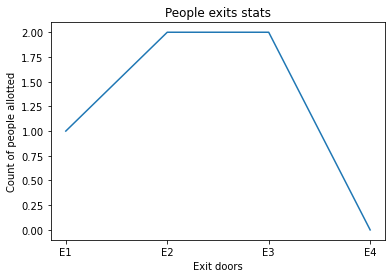

In [22]:
# Statistics of exit-doors
allotted_count = {}
for i in exits_coor:
    allotted_count[i[0]] = 0
for i in ppl_coor:
    allotted_count[allotted_doors[(i[1] - 1)*N + i[2]][1]] += 1

x_axis = []
for i in exits_coor:
    x_axis.append(i[0])

y_axis = []
for i in x_axis:
    y_axis.append(allotted_count[i])

plt.plot(x_axis,y_axis)
plt.xlabel('Exit doors')
plt.ylabel('Count of people allotted')
plt.title('People exits stats')
plt.show()

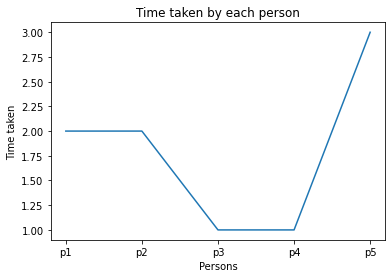

In [23]:
# Time taken by each person
x_axis = []
for i in ppl_coor:
    x_axis.append(i[0])

y_axis = []
for i in ppl_coor:
    y_axis.append(allotted_doors[(i[1] - 1)*N + i[2]][0])

plt.plot(x_axis,y_axis)
plt.xlabel('Persons')
plt.ylabel('Time taken')
plt.title('Time taken by each person')
plt.show()